In [6]:
import os
import numpy as np
import scipy.io
from matplotlib import pyplot

In [7]:
os.chdir('C:\python')
os.getcwd()

'C:\\python'

In [8]:
data=scipy.io.loadmat('ex3data1.mat')
X, y = data['X'], data['y'].ravel()
y[y==10] = 0
m = y.size
indices = np.random.permutation(m)
rand_indices = np.random.choice(m,100,replace=False)
sel=X[rand_indices,:]


In [25]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def displayData(X,example_width=None, figsize=(10,10)):
    if X.ndim==2:
        m,n = X.shape
    elif X.ndim==1:
        n=X.size
        m=1
        X=X[None]
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')
    
    example_width=example_width or int(np.round(np.sqrt(n)))
    example_height=n/example_width
    
    display_rows=int(np.floor(np.sqrt(m)))
    display_cols=int(np.ceil(m/display_rows))
    
    fig,ax_array=pyplot.subplots(display_rows,display_cols,figsize=figsize)
    fig.subplots_adjust(wspace=0.025,hspace=0.025)
    
    ax_array=[ax_array] if m==1 else ax_array.ravel()
    
    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width,example_width,order='F'),cmap='Greys',extent=[0,1,0,1])
        ax.axis('off')

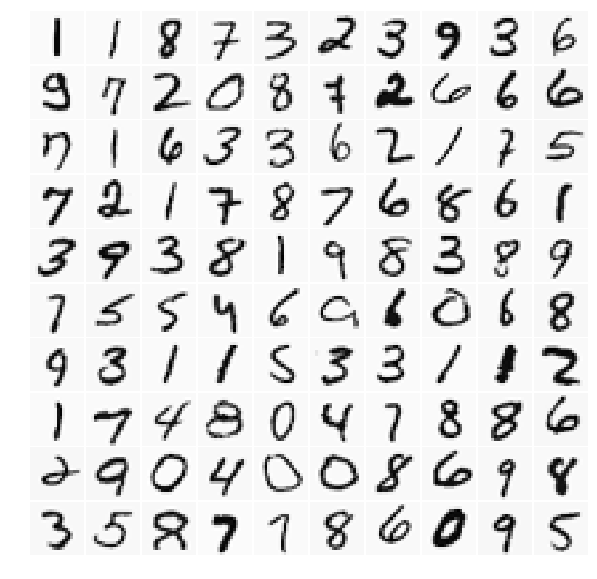

In [10]:
displayData(sel)

In [11]:
input_layer_size = 400   # theta1[1] = X.T.shape[0]
hidden_layer_size = 25   # a2.shape[0]=theta1[0] => theta2[1]
num_label = 10

weights = scipy.io.loadmat('ex3weights.mat')
theta1,theta2 = weights['Theta1'], weights['Theta2']
theta2 = np.roll(theta2,1,axis=0)   #행을 한 줄씩 뒤로. theta2만 해줘도 되는겨?


In [23]:
def predict(theta1,theta2,X):
    if X.ndim == 1:
        X = X[None]
    
    m = X.shape[0]
    num_labels = theta2.shape[0]
    p = np.zeros(m)
    
    X=np.concatenate([np.ones((m,1)),X],axis=1)
    z2=theta1.dot(X.T)
    a2=sigmoid(z2)
    a2=np.concatenate([np.ones((1,a2.shape[1])),a2],axis=0)
    
    z3=theta2.dot(a2)
    a3=sigmoid(z3)
    
    p=np.argmax(a3,axis=0)
    
    return p
    

In [26]:
pred=predict(theta1,theta2,X)
np.mean(pred==y)*100

97.52